<a href="https://colab.research.google.com/github/supsi-dacd-isaac/TeachDecisionMakingUncertainty/blob/main/group_work/stochastic_network_design/Problem_Statement_NetworkCapacityDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Network Capacity Optimization Problem with Uncertain Loads**

### **Problem Statement:**

In this group work, you will act as a network operator. Your task is to design a new network segment connecting 4 energy demand points (e.g., four new households in a residential area). We need to decide how much capacity to install on three distribution lines ($y_1, y_2, y_3$), and how much generators capacity to install on three candidate locations ($x_2,x_3,x_4$).

----

### **Network components:**

A schematic diagram of the network is provided (See the figure). There are 4 nodes in the network, indexed by $i=1,2,3,4$. The key elments in the network are defined as follows:

- **Energy Demand:** Non-negative energy demand is represented by the vector  
$$\xi = [\xi_1,\xi_2,\xi_3,\xi_4] \in \mathbb{R}^{4,+} ,$$ with one value for each node.



- **Distribution Lines:** The nodes are connected in a radial topology where all nodes connect only via node 1. The power capacities of the three distribution lines are defined as:
$$y = [y_1,y_2,y_3] \in \mathbb{R}^{3,+},$$
where $ y_1 $ is the capacity between Node 1 and Node 2, $ y_2 $ is the capacity between Node 1 and Node 3, and $ y_3 $ is the line capacity between Node 1 and Node 4.




- **Generators:** There are 3 generators in the network, and their capacity (maximum power that can be produced) is defined by the non-negative vector
$$x = [x_2,x_3,x_4]\in \mathbb{R}^{3,+}.$$
Generation capacity can only be installed at nodes 2, 3, and 4.


----

###**Objective function:**
Your goal is to minimize the total cost of the investment while ensuring that the network capacity constraints are sattisfied. The cost of the investment can be quantified via a linear function $$\sum_{i=1}^3 c_{x,i} x_{i+1} + \sum_{i=1}^3 c_{y,i} y_i^T,$$ where $c_x $ represents a row vector of generator unit costs in [CHF/pu] for the 3 candiate nodes, and $c_y $ is cost in per-unit for the distribution line capacities.

----

### **Constraint functions:**

**Total production constraint**:
* $x_2 + x_3 + x_4 \geq \sum_{i=1}^{4} \xi_i$

the total generation capacity must exceed the demand


**Nodal in-flow capacity at node 1**:
* $y_1 + y_2 + y_3 \geq \xi_1 $
There is not generation in node 1, hence, the total in-flow capacity in node 1 must be larger than its energy demand

**Nodal flow constraints on nodes 2, 3, 4**:
* $x_2 + y_1 \geq \xi_2,$
* $x_3 + y_2 \geq \xi_3,$
* $x_4 + y_3 \geq \xi_4,$
the sum of production and in-flow capactiy must be larger than the demand


**Distribution capacity on all the lines**:
* $y_1 \geq  x_2- \xi_2, $
* $y_2 \geq  x_3 -\xi_3, $
* $y_3 \geq  x_4 -\xi_4, $

if we have exceess generation capacity ($\Delta_i = x_i - \xi_i$) , we must be able to forward this power to the network such that $y_{i-1} \geq \Delta_i$

----

### **Linear Programming formulation (LP):**

The capacity allocation problem can be formulated as a linear optimization problem formulated as follows:

\begin{align*}
\min_{x, y} \quad & c_x^\top x + c_y^\top y \\
\text{s.t.} \quad & A_xx  + A_yy \geq b_\xi \xi\\
 \quad & x_{min} \leq x  \leq x_{max}\\
  \quad & y_{min} \leq y  \leq y_{max}\\
\end{align*}
where  ($x_{min},x_{max}, y_{min}, y_{max}$) are minmium and maximum capacities.
By aggregating decision variables and flipping the inequaltiy sign we can write this as a compact LP as follows:


\begin{align*}
\min_{a\in \mathcal{A}} \quad & c^T a \\
\text{s.t.} \quad & A_{in}a \leq b_{in}
\end{align*}
where
*  $a=(x,y)$ is the vector of actions (decision variables with the 6 capacities).
*  The matrix $A_{in} = [-A_x, -A_y]$ combines the generation matrix $ A_x$ and the line coefficient matrix $ A_y $.
*  $b_{in} = -b_\xi \xi$ are the right-hand side load constraints
* $\mathcal{A}$ is the se of feasible actions, defined by ($x_{min},x_{max}, y_{min}, y_{max}$).

### The inequalty constraint matrix
 $ A_{\text{in}} $  and is defined as follows:

$$
A_{\text{in}} =
\begin{bmatrix}
-1 & -1 & -1 & 0 & 0 & 0 \\    \tag{Network capacity constraints}
0 & 0 & 0 & -1 & -1 & -1 \\   %  Node 1 in-flow
-1 & 0 & 0 & -1 & 0 & 0 \\    % Node 2 in-flow + gen  
0 & -1 & 0 & 0 & -1 & 0 \\    % Node 3 in-flow + gen  
0 & 0 & -1 & 0 & 0 & -1 \\    % Node 4 in-flow + gen  
1 & 0 & 0 & -1 & 0 & 0 \\   % Line capacity 1  
0 & 1 & 0 & 0 & -1 & 0 \\   % Line capacity 2  
0 & 0 & 1 & 0 & 0 & -1      % Line capacity 3  
\end{bmatrix}
$$
### The load right-hand side coefficients
* The right-hand side vector$ b_{\text{in}} $ is given by:
$$
b_{\text{in}} =
\begin{bmatrix}
-\sum\limits_{i=1}^{4} \xi \\
-\xi_0 \\
-\xi_1 \\
-\xi_2 \\
-\xi_3 \\
\xi_1 \\
\xi_2 \\
\xi_3
\end{bmatrix}
$$









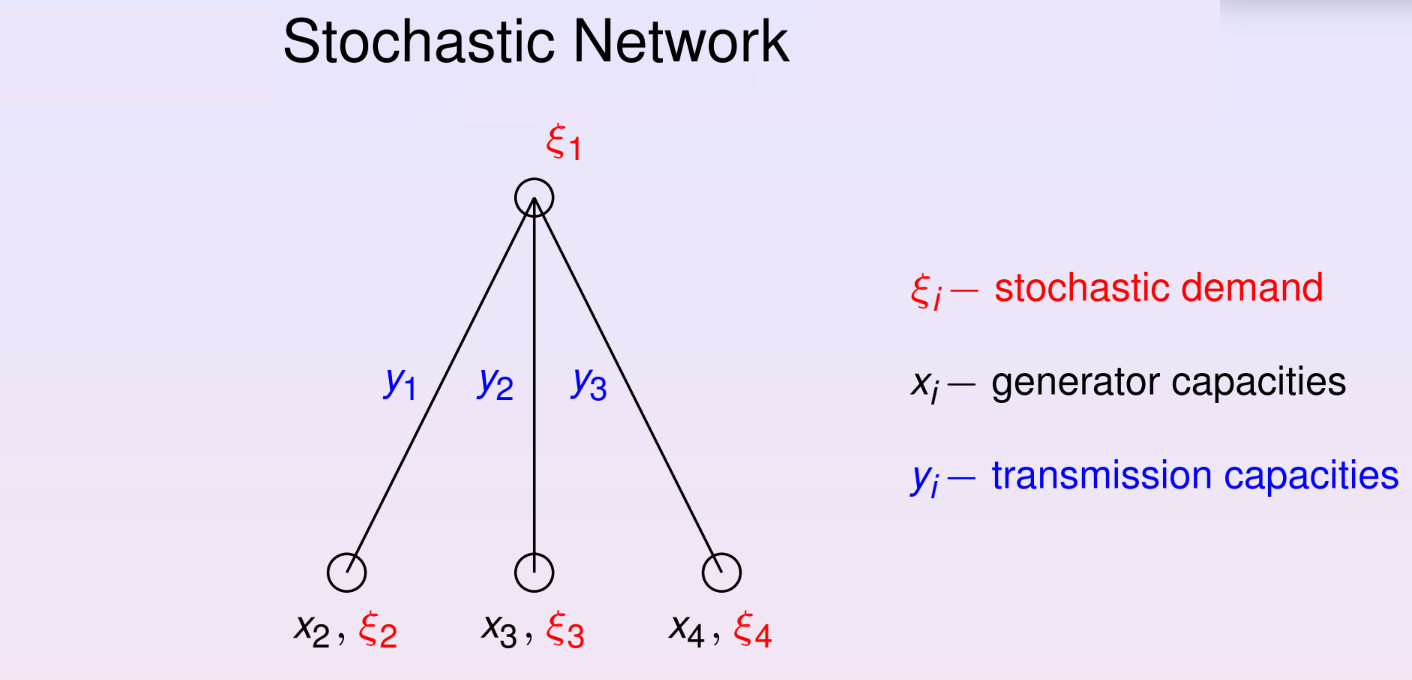

###  **Tasks**

Given the following data and information about the uncertainty of the system:

* **[Task 1]** **Solve deterministic linear program:**
  
  a. Solve the deterministic linear program using the *nominal data*.  
  
  b.  Discuss the results: What is the optimized capacity investment $$a^{\star}_{det}=(x,y)^{\star}_{det}$$ and what is the resulting cost?

---

* **[Task 2]**  **Discuss modelling options and define uncertain program:**
  Recognize that the four loads $\xi$ are uncertain, hence might deviate from their nominal values. *Additional data* is made available to better account for these uncertainties.

   a.  Discuss how this additional information can be incorporated into the decision-making process. Which modeling techniques would you recommend for this case? Justify your choice.

   c. Formulate, both mathematically and numerically, a decision-making problem under uncertainty based on your selected approach.

---

* **[Task 3]**  **Optimization under uncertainty**
  
  a.  Optimize the network design according to the model defined in Task 2.
    
  b. Determine the optimized capacity investment $$a^{\star}_{unc}= (x,y)^{\star}_{unc},$$ and compute the associated cost.
   
  c. Discuss the resutls and compare the results with the deterministic solution
     
---

* **[Task 4]** **Additional data has been gathered for validation**.

A validation data set
$$\mathcal{D}=\{ \xi^{(i)} \}_{i=1}^{N},$$

 will be used to check how well the two optimized solutions are performing. We will use a performance score for this $$g (a^\star, \xi) = \max( A_{in}a^\star  - b_{in}(\xi)) \forall \xi \in \mathcal{D}.$$  
the function $g (a^\star, \xi) $ gives us a score on the constraints. If any of the capacity constraints is not sattisfied  constraint


  a. Using $\mathcal{D}$, compare the first design $a^\star_{det}$ and second design $a^\star_{unc}$. Plot the probability density function (PDF) and cumulative distribution function (CDF) of the performance score.  
  


  b. Estimate the probability $$\mathbb{P}[ g (a^\star, \xi_i)  > 0 ],$$ for both designs and discuss the results.



  c. Estimate the total energy demand expectation when we fail to sattisfy the capacity constraints $$\mathbb{E}[\sum_{i=1}^4 \xi_i |g (a^\star, \xi)>0],$$ for both designs, where $ENS(\xi) = \sum_{i=1}^4 \xi_i $ is the total energynot supplied

---



# **Group 1 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [0, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, sources of uncertainty**

- The load is uncertain. However, we do not know much about it.  
- Only a hypothetical error level of **30%** is provided.  
- No distribution family is specified.


#### **Validation data**
- The data set for task 4 consists of **20,000 samples** obtained from the true demand distribution.  
- The data frame `df_tasks_4_validation` can be loaded and visualized as follows:



```python
import pandas as pd

url_val = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task4_validation.csv"

# Load the CSV into a DataFrame
df_tasks_4_validation = pd.read_csv(url_val)

# Display the first few rows
df_tasks_4_validation.head() # each row represent one load
array_of_demand_data_in_node_1 = df_tasks_4_validation.iloc[:,1].values

import matplotlib.pyplot as plt
plt.hist(df_tasks_4_validation.iloc[:,0].values, bins=100, density=True)
plt.grid()
plt.xlabel('Load in node 0')
plt.ylabel('PDF')
plt.show()

```

# **Group 2 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [0, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, sources of uncertainty**

We assume the loads are distributed as Gaussian:

$$
\xi_i \sim \mathcal{N}(\mu_i, \sigma^2_i), \quad i=1,2,3,4
$$

Mean values:

$$
\mu_{\xi} = [22, 10, 25, 10]
$$

Standard deviations:

$$
\sigma_{\xi} = [2.2, 1.0, 2.5, 1.0]
$$


#### **Validation data**
- The data set for task 4 consists of **20,000 samples** obtained from the true demand distribution.  
- The data frame `df_tasks_4_validation` can be loaded and visualized as follows:



```python
import pandas as pd

url_val = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task4_validation.csv"

# Load the CSV into a DataFrame
df_tasks_4_validation = pd.read_csv(url_val)

# Display the first few rows
df_tasks_4_validation.head() # each row represent one load
array_of_demand_data_in_node_1 = df_tasks_4_validation.iloc[:,1].values

import matplotlib.pyplot as plt
plt.hist(df_tasks_4_validation.iloc[:,0].values, bins=100, density=True)
plt.grid()
plt.xlabel('Load in node 0')
plt.ylabel('PDF')
plt.show()

```



# **Group 3 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [0, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, sources of uncertainty**

- The load is uncertain. However, we do not know much about it.  
- Only a hypothetical error level of **20%** is provided.  
- No distribution family is specified.


#### **Validation data**
- The data set for task 4 consists of **20,000 samples** obtained from the true demand distribution.  
- The data frame `df_tasks_4_validation` can be loaded and visualized as follows:



```python
import pandas as pd

url_val = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task4_validation.csv"

# Load the CSV into a DataFrame
df_tasks_4_validation = pd.read_csv(url_val)

# Display the first few rows
df_tasks_4_validation.head() # each row represent one load
array_of_demand_data_in_node_1 = df_tasks_4_validation.iloc[:,1].values

import matplotlib.pyplot as plt
plt.hist(df_tasks_4_validation.iloc[:,0].values, bins=100, density=True)
plt.grid()
plt.xlabel('Load in node 0')
plt.ylabel('PDF')
plt.show()

```



# **Group 4 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [0, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, sources of uncertainty**

We assume the loads are distributed as Gaussian:

$$
\xi_i \sim \mathcal{N}(\mu_i, \sigma_i), \quad i=1,2,3,4
$$

Mean values:

$$
\mu_{\xi} = [22, 10, 25, 10]
$$

Standard deviations:

$$
\sigma_{\xi} = [2.2, 1.0, 2.5, 1.0]
$$


#### **Validation data**
- The data set for task 4 consists of **20,000 samples** obtained from the true demand distribution.  
- The data frame `df_tasks_4_validation` can be loaded and visualized as follows:



```python
import pandas as pd

url_val = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task4_validation.csv"

# Load the CSV into a DataFrame
df_tasks_4_validation = pd.read_csv(url_val)

# Display the first few rows
df_tasks_4_validation.head() # each row represent one load
array_of_demand_data_in_node_1 = df_tasks_4_validation.iloc[:,1].values

import matplotlib.pyplot as plt
plt.hist(df_tasks_4_validation.iloc[:,0].values, bins=100, density=True)
plt.grid()
plt.xlabel('Load in node 0')
plt.ylabel('PDF')
plt.show()

```


# **Group 5 data**

#### **Nominal data**

- $c_x = [5, 3, 4]$  
- $c_y = [5, 4, 5]$  
- $\xi = [22, 10, 25, 10]$  
- $[x_{min}, x_{max}] = [0, 100]$  
- $[y_{min}, y_{max}] = [0, 100]$

#### **Additional data, sources of uncertainty**

- The load is uncertain.  
- We have access to **100 samples from the true load distribution**.  
- No assumption on distribution family is needed.



```python
import pandas as pd

url_design = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task2_and_3.csv"

# Load the CSV into a DataFrame
df_tasks_2_3_modelling_and_design = pd.read_csv(url_design)

# Display the first few rows
df_tasks_2_3_modelling_and_design.head()
```


#### **Validation data**
- The data set for task 4 consists of **20,000 samples** obtained from the true demand distribution.  
- The data frame `df_tasks_4_validation` can be loaded and visualized as follows:



```python
import pandas as pd

url_val = "https://raw.githubusercontent.com/supsi-dacd-isaac/TeachDecisionMakingUncertainty/refs/heads/main/group_work/stochastic_network_design/demand_data_task4_validation.csv"

# Load the CSV into a DataFrame
df_tasks_4_validation = pd.read_csv(url_val)

# Display the first few rows
df_tasks_4_validation.head() # each row represent one load
array_of_demand_data_in_node_1 = df_tasks_4_validation.iloc[:,1].values

import matplotlib.pyplot as plt
plt.hist(df_tasks_4_validation.iloc[:,0].values, bins=100, density=True)
plt.grid()
plt.xlabel('Load in node 0')
plt.ylabel('PDF')
plt.show()

```
